<a href="https://colab.research.google.com/github/saqlineniam/100-Days-ML/blob/main/47.%20PCA%2C_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [28]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


Data source import complete.


In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
df = pd.read_csv(r'/content/sample_data/mnist_train_small.csv')

In [31]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.shape

(19999, 785)

In [33]:
import matplotlib.pyplot as plt

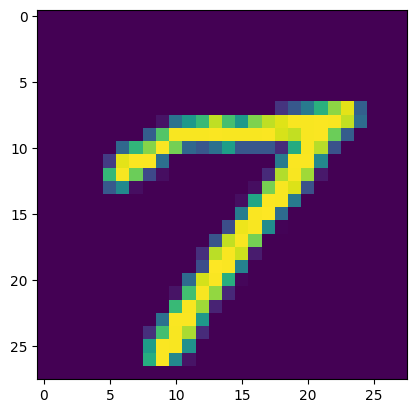

In [34]:
plt.imshow(df.iloc[1999,1:].values.reshape(28,28))

In [35]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.95525

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components = 100)

In [45]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [46]:
x_train_trf.shape

(15999, 100)

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [49]:
y_train_trf_pred = knn.predict(x_test_trf)

In [50]:
accuracy_score(y_train_trf_pred,y_test)

0.9625

In [ ]:
for i in range (1,785):
    pca = PCA(n_components = i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf, y_train)
    y_train_trf_pred = knn.predict(x_test_trf)
    print(accuracy_score(y_train_trf_pred,y_test))

In [51]:
pca = PCA(n_components = 2)

In [52]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [53]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter(x = x_train_trf[:,0],
                 y = x_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()